In [5]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader import data as web

# do all our graphics inline
%matplotlib inline

# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

# Obtaining historical stock and index data

## Fetching stock data from Yahoo! 

In [13]:
import pandas as pd
import datetime
import yfinance as yf

# Define the start and end dates
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# Fetch the data using yfinance
msft = yf.download('MSFT', start=start, end=end)

# Display the first five rows
print(msft.head())

[*********************100%%**********************]  1 of 1 completed

             Open   High    Low  Close  Adj Close    Volume
Date                                                       
2012-01-03  26.55  26.96  26.39  26.77     21.201  64731500
2012-01-04  26.82  27.47  26.78  27.40     21.699  80516100
2012-01-05  27.38  27.73  27.29  27.68     21.921  56081400
2012-01-06  27.53  28.19  27.53  28.11     22.262  99455500
2012-01-09  28.05  28.10  27.72  27.74     21.969  59706800


In [15]:
# retrieves the historical prices for a list of stocks
def get(tickers, start, end):
    def data(ticker):
        return pd.io.data.DataReader(ticker, 'yahoo', 
                                     start, end)
        
    datas = map(data, tickers)
    
    return pd.concat(datas, keys=tickers, 
                     names=['Ticker', 'Date'])

In [20]:
# List of ticker symbols
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO']

# Fetch the data for all tickers
all_data = yf.download(tickers, start=start, end=end)

# Display the first five rows of the data
print(all_data.head())

[*********************100%%**********************]  9 of 9 completed

Price      Adj Close                 ...    Volume                  
Ticker            AA    AAPL    DAL  ...      MSFT      PEP      UAL
Date                                 ...                            
2012-01-03    20.328  12.417  7.076  ...  64731500  5348800  3910000
2012-01-04    20.812  12.484  7.050  ...  80516100  6042400  5809200
2012-01-05    20.614  12.622  7.332  ...  56081400  4909100  8124800
2012-01-06    20.173  12.754  7.323  ...  99455500  6533000  3904500
2012-01-09    20.768  12.734  7.288  ...  59706800  5859600  5323200

[5 rows x 54 columns]


## Fetching Index data from Yahoo!

In [25]:
import pandas as pd
import yfinance as yf
import datetime

# Define the start and end dates
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# Fetch the daily S&P 500 data
sp_500 = yf.download("^GSPC", start=start, end=end)

# Display the first five rows of the data
print(sp_500.head())

[*********************100%%**********************]  1 of 1 completed

               Open     High      Low    Close  Adj Close      Volume
Date                                                                 
2012-01-03  1258.86  1284.62  1258.86  1277.06    1277.06  3943710000
2012-01-04  1277.03  1278.73  1268.10  1277.30    1277.30  3592580000
2012-01-05  1277.30  1283.05  1265.26  1281.06    1281.06  4315950000
2012-01-06  1280.93  1281.84  1273.34  1277.81    1277.81  3656830000
2012-01-09  1277.83  1281.99  1274.55  1280.70    1280.70  3371600000


# Visualizing financial time series data

## Plotting closing prices

In [29]:
# reset the index to make everything columns
just_closing_prices = all_data[['Adj Close']].reset_index()
just_closing_prices[:5]

Price        Date Adj Close          ...                       
Ticker                   AA    AAPL  ...    MSFT     PEP    UAL
0      2012-01-03    20.328  12.417  ...  21.201  46.224  18.90
1      2012-01-04    20.812  12.484  ...  21.699  46.460  18.52
2      2012-01-05    20.614  12.622  ...  21.921  46.098  18.39
3      2012-01-06    20.173  12.754  ...  22.262  45.521  18.21
4      2012-01-09    20.768  12.734  ...  21.969  45.757  17.93

[5 rows x 10 columns]

In [39]:
import yfinance as yf
import pandas as pd
import datetime

# Define the start and end dates
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# List of ticker symbols
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO']

# Fetch the data for all tickers
all_data = yf.download(tickers, start=start, end=end)

# Extract the adjusted close prices
just_closing_prices = all_data['Adj Close']

# Reset the index to include 'Date' as a column
just_closing_prices = just_closing_prices.reset_index()

# Melt the DataFrame to have 'Date' and 'Ticker' as columns
just_closing_prices_melted = just_closing_prices.melt(id_vars=['Date'], var_name='Ticker', value_name='Adj Close')

# Pivot 'Date' to the index and 'Ticker' values to columns
daily_close_px = just_closing_prices_melted.pivot(index='Date', columns='Ticker', values='Adj Close')

# Display the first five rows of the pivoted DataFrame
print(daily_close_px.head())

[*********************100%%**********************]  9 of 9 completed

Ticker          AA    AAPL    DAL  ...    MSFT     PEP    UAL
Date                               ...                       
2012-01-03  20.328  12.417  7.076  ...  21.201  46.224  18.90
2012-01-04  20.812  12.484  7.050  ...  21.699  46.460  18.52
2012-01-05  20.614  12.622  7.332  ...  21.921  46.098  18.39
2012-01-06  20.173  12.754  7.323  ...  22.262  45.521  18.21
2012-01-09  20.768  12.734  7.288  ...  21.969  45.757  17.93

[5 rows x 9 columns]


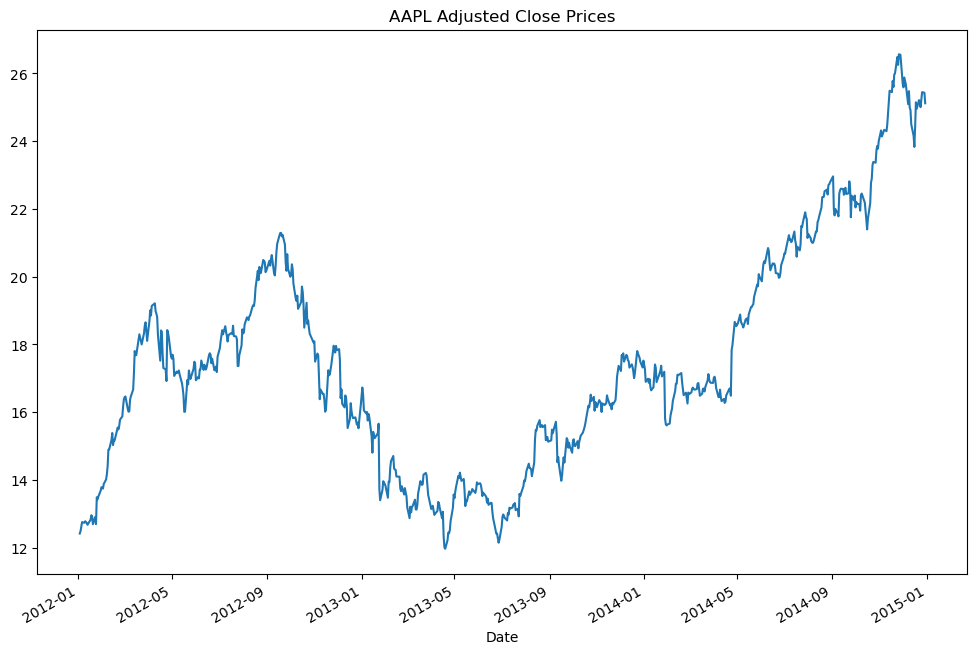

In [43]:
# Plot the AAPL adjusted close prices
_ = daily_close_px['AAPL'].plot(figsize=(12, 8), title="AAPL Adjusted Close Prices")

# Save the plot to a file
plt.savefig('5104OS_05_01.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

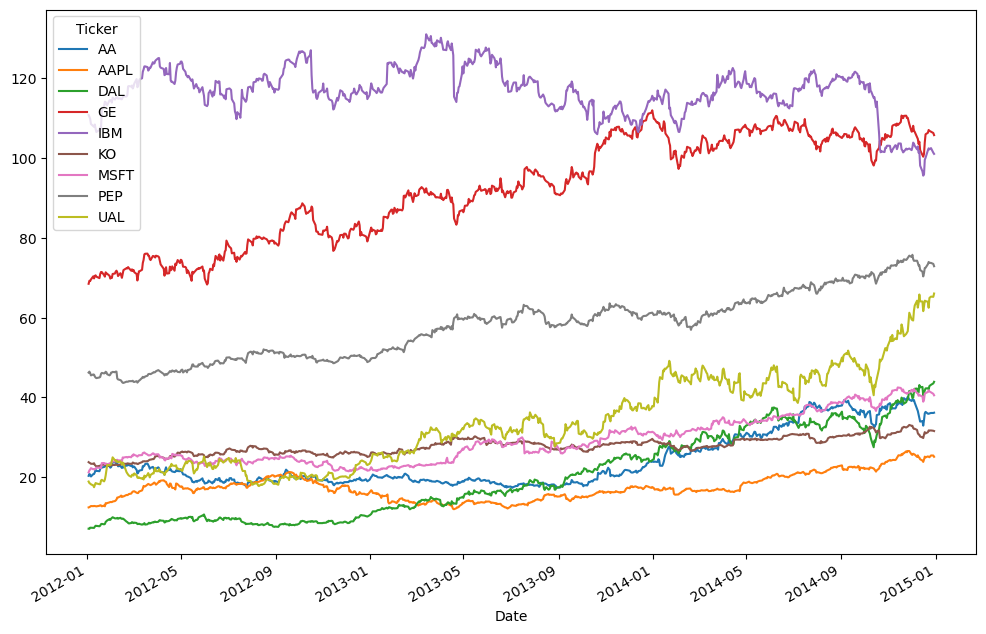

In [45]:
# plot all the stock closing prices against each other
_ = daily_close_px.plot(figsize=(12,8));
plt.savefig('5104OS_05_02.png', bbox_inches='tight', dpi=300)

## Plotting volumes series data

[*********************100%%**********************]  9 of 9 completed


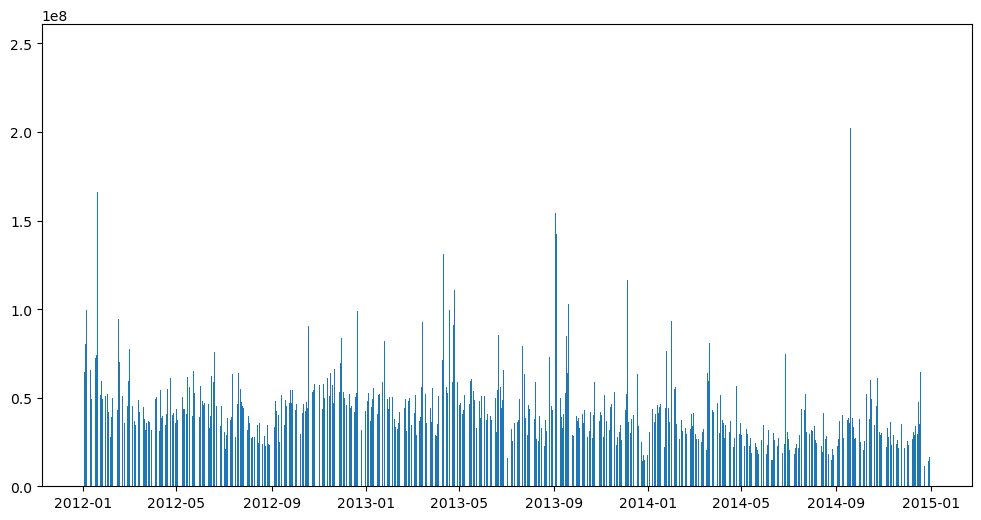

In [52]:
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

# Define the start and end dates
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# List of ticker symbols
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO']

# Fetch the data for all tickers
all_data = yf.download(tickers, start=start, end=end)

# Extract the volume information for MSFT
msftV = all_data['Volume']['MSFT']

# Plot the daily volumes for MSFT
plt.bar(msftV.index, msftV)

# Set the plot size
plt.gcf().set_size_inches(12, 6)

# Save the plot to a file
plt.savefig('5104OS_05_03.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

## Combined Price and Volumes

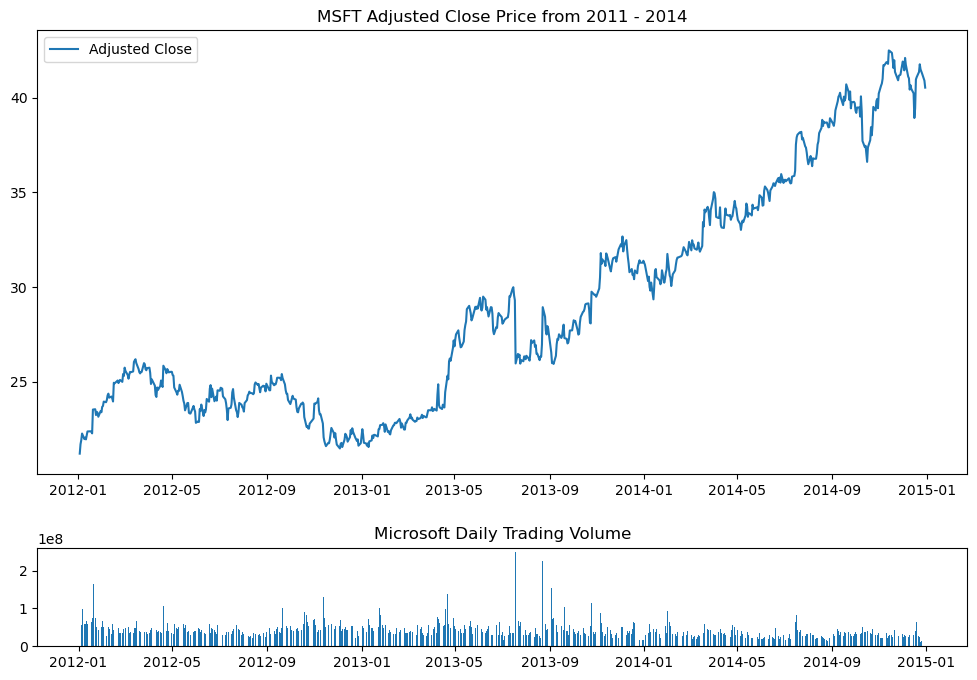

In [55]:
# draw a combined price vs volume graph
# subdivide the whole plot
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
# plot the price chart on the top
top.plot(daily_close_px.index, 
         daily_close_px['MSFT'], 
         label='Adjusted Close')
plt.title('MSFT Adjusted Close Price from 2011 - 2014')
plt.legend(loc=2)
# pick the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
# draw the bar at the bottom
bottom.bar(msftV.index, msftV)
plt.title('Microsoft Daily Trading Volume')
plt.gcf().set_size_inches(12,8) 
# set the size
plt.subplots_adjust(hspace=0.75)
plt.savefig('5104OS_05_04.png', bbox_inches='tight', dpi=300)

## Plotting candlesticks

In [62]:
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

# Define the start and end dates
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# List of ticker symbols
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO']

# Fetch the data for all tickers
all_data = yf.download(tickers, start=start, end=end)

# Subset to MSFT in Dec 2014
subset = all_data.xs('MSFT', level='Ticker', axis=1).loc['2014-12']

# Display the first five rows of the subset
print(subset.head())

[*********************100%%**********************]  9 of 9 completed

Price       Adj Close  Close   High    Low   Open    Volume
Date                                                       
2014-12-01     41.909  48.62  48.78  47.71  47.88  31191600
2014-12-02     41.771  48.46  49.05  48.20  48.84  25773500
2014-12-03     41.443  48.08  48.50  47.81  48.44  23534800
2014-12-04     42.098  48.84  49.06  48.20  48.39  30320400
2014-12-05     41.736  48.42  48.97  48.38  48.82  27313400


In [66]:
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define the start and end dates
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# List of ticker symbols
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO']

# Fetch the data for all tickers
all_data = yf.download(tickers, start=start, end=end)

# Subset to MSFT in Dec 2014
subset = all_data.xs('MSFT', level='Ticker', axis=1).loc['2014-12']

# Reset the index to get 'Date' as a column
subset = subset.reset_index()

# Convert dates to Matplotlib format
subset['date_num'] = subset['Date'].apply(lambda date: mdates.date2num(date.to_pydatetime()))

# Display the first five rows of the subset
print(subset.head())

[*********************100%%**********************]  9 of 9 completed

Price       Date  Adj Close  Close  ...   Open    Volume  date_num
0     2014-12-01     41.909  48.62  ...  47.88  31191600   16405.0
1     2014-12-02     41.771  48.46  ...  48.84  25773500   16406.0
2     2014-12-03     41.443  48.08  ...  48.44  23534800   16407.0
3     2014-12-04     42.098  48.84  ...  48.39  30320400   16408.0
4     2014-12-05     41.736  48.42  ...  48.82  27313400   16409.0

[5 rows x 8 columns]


In [68]:
# extract only values required, in order, as tuples
subset_as_tuples = [tuple(x) for x in subset[['date_num', 
                                              'Open', 
                                              'High', 
                                              'Low', 
                                              'Close']].values]
subset_as_tuples[:5]

[(16405.0,
  47.880001068115234,
  48.779998779296875,
  47.709999084472656,
  48.619998931884766),
 (16406.0,
  48.84000015258789,
  49.04999923706055,
  48.20000076293945,
  48.459999084472656),
 (16407.0, 48.439998626708984, 48.5, 47.810001373291016, 48.08000183105469),
 (16408.0,
  48.38999938964844,
  49.060001373291016,
  48.20000076293945,
  48.84000015258789),
 (16409.0,
  48.81999969482422,
  48.970001220703125,
  48.380001068115234,
  48.41999816894531)]

In [70]:
# required imports for fomatting
from matplotlib.dates import DateFormatter
week_formatter = DateFormatter('%b %d')  # e.g., Jan 12

In [72]:
# We want to only display labels for Mondays
from matplotlib.dates import (WeekdayLocator, MONDAY)
mondays = WeekdayLocator(MONDAY) # major ticks on the mondays

[*********************100%%**********************]  9 of 9 completed


<Figure size 1200x800 with 0 Axes>

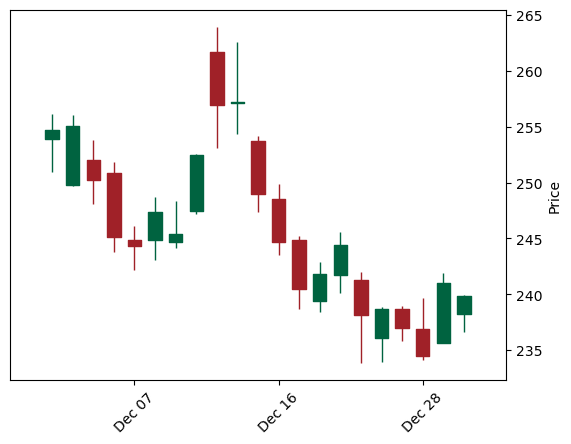

In [96]:
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf

# Define the start and end dates
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2024, 7, 15)

# List of ticker symbols
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO']

# Fetch the data for all tickers
all_data = yf.download(tickers, start=start, end=end, group_by='ticker')

# Subset to MSFT in Dec 2024
msft_data = all_data['MSFT'].loc['2022-12']

# Ensure the index is a DatetimeIndex
msft_data.index = pd.to_datetime(msft_data.index)

# Prepare the data in the format required by mplfinance
msft_ohlc = msft_data[['Open', 'High', 'Low', 'Close']]
# Draw the candlestick plot
plt.figure(figsize=(12, 8))
fig, ax = plt.subplots()

# Set the locator and formatter for the x-axis
mondays = mdates.WeekdayLocator(mdates.MONDAY)
week_formatter = mdates.DateFormatter('%b %d')

ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(week_formatter)

# Draw the candlesticks using mplfinance
mpf.plot(msft_ohlc, type='candle', ax=ax, style='charles')

plt.savefig('5104OS_05_05.png', bbox_inches='tight', dpi=300)
plt.show()

# Fundamental Financial Calculations

## Calculating daily percentage change

In [100]:
# calc % change from day 0 to day 1
AA_p_t0 = daily_close_px.iloc[0]['AA']  #Pt-1
AA_p_t1 = daily_close_px.iloc[1]['AA']  #Pt
r_t1 = AA_p_t1 / AA_p_t0 - 1 # returns
AA_p_t0, AA_p_t1, r_t1 

(20.327646255493164, 20.812164306640625, 0.023835423199404016)

In [106]:
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf

# Define the start and end dates
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# List of ticker symbols
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO']

# Fetch the data for all tickers
all_data = yf.download(tickers, start=start, end=end)

# Extract the adjusted close prices
just_closing_prices = all_data['Adj Close']

# Reset the index to get 'Date' as a column
just_closing_prices.reset_index(inplace=True)

# Melt the DataFrame to have 'Date' and 'Ticker' as columns
just_closing_prices_melted = just_closing_prices.melt(id_vars=['Date'], var_name='Ticker', value_name='Adj Close')

# Pivot 'Date' to the index and 'Ticker' values to columns
daily_close_px = just_closing_prices_melted.pivot(index='Date', columns='Ticker', values='Adj Close')

[*********************100%%**********************]  9 of 9 completed


In [108]:
# show the DataFrame that is the numerator
price_matrix_minus_day1 = daily_close_px.iloc[1:]
price_matrix_minus_day1[:5]

Ticker          AA    AAPL    DAL  ...    MSFT     PEP    UAL
Date                               ...                       
2012-01-04  20.812  12.484  7.050  ...  21.699  46.460  18.52
2012-01-05  20.614  12.622  7.332  ...  21.921  46.098  18.39
2012-01-06  20.173  12.754  7.323  ...  22.262  45.521  18.21
2012-01-09  20.768  12.734  7.288  ...  21.969  45.757  17.93
2012-01-10  20.790  12.780  7.279  ...  22.048  45.709  17.48

[5 rows x 9 columns]

In [110]:
# the numerator is a 2-d array, but excludes the last day
daily_close_px.iloc[:-1].values

array([[20.32764626, 12.4169836 ,  7.07629442, ..., 21.20051384,
        46.22365189, 18.89999962],
       [20.81216431, 12.4837122 ,  7.04989147, ..., 21.69943619,
        46.46033859, 18.52000046],
       [20.61395454, 12.62230873,  7.33153534, ..., 21.92119026,
        46.09835052, 18.38999939],
       ...,
       [35.98258209, 25.00034523, 42.85527802, ..., 41.49488449,
        73.75367737, 64.93000031],
       [36.09667969, 25.44226646, 43.15852356, ..., 41.27077103,
        73.72329712, 65.27999878],
       [36.09667969, 25.42441559, 43.5063591 , ..., 40.9001236 ,
        73.48017883, 65.22000122]])

In [116]:
import pandas as pd
import yfinance as yf
import datetime

# Define the start and end dates
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# List of ticker symbols
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO']

# Fetch the data for all tickers
all_data = yf.download(tickers, start=start, end=end)

# Extract the adjusted close prices
just_closing_prices = all_data['Adj Close']

# Reset the index to get 'Date' as a column
just_closing_prices.reset_index(inplace=True)

# Melt the DataFrame to have 'Date' and 'Ticker' as columns
just_closing_prices_melted = just_closing_prices.melt(id_vars=['Date'], var_name='Ticker', value_name='Adj Close')

# Pivot 'Date' to the index and 'Ticker' values to columns
daily_close_px = just_closing_prices_melted.pivot(index='Date', columns='Ticker', values='Adj Close')

[*********************100%%**********************]  9 of 9 completed


In [124]:
import pandas as pd
import yfinance as yf
import datetime

# Define the start and end dates
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# List of ticker symbols
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO']

# Fetch the data for all tickers
all_data = yf.download(tickers, start=start, end=end)

# Extract the adjusted close prices
just_closing_prices = all_data['Adj Close']

# Reset the index to get 'Date' as a column
just_closing_prices.reset_index(inplace=True)

# Melt the DataFrame to have 'Date' and 'Ticker' as columns
just_closing_prices_melted = just_closing_prices.melt(id_vars=['Date'], var_name='Ticker', value_name='Adj Close')

# Pivot 'Date' to the index and 'Ticker' values to columns
daily_close_px = just_closing_prices_melted.pivot(index='Date', columns='Ticker', values='Adj Close')

# Calculate the daily percentage change using pct_change
daily_pct_change = daily_close_px.pct_change()

# Display the results for the first two columns using .loc
dpc_subset = daily_pct_change.loc[:, daily_pct_change.columns[0:2]].head()

print(dpc_subset)

[*********************100%%**********************]  9 of 9 completed

Ticker         AA   AAPL
Date                    
2012-01-03    NaN    NaN
2012-01-04  0.024  0.005
2012-01-05 -0.010  0.011
2012-01-06 -0.021  0.010
2012-01-09  0.029 -0.002


In [129]:
# Set NaNs to 0
daily_pct_change.fillna(0, inplace=True)

# Display the first five rows and columns
print(daily_pct_change.iloc[:5, :5])

Ticker         AA   AAPL    DAL         GE    IBM
Date                                             
2012-01-03  0.000  0.000  0.000  0.000e+00  0.000
2012-01-04  0.024  0.005 -0.004  1.089e-02 -0.004
2012-01-05 -0.010  0.011  0.040 -5.391e-04 -0.005
2012-01-06 -0.021  0.010 -0.001  5.391e-03 -0.011
2012-01-09  0.029 -0.002 -0.005  1.126e-02 -0.005


## Calculating simple daily cumulative returns

In [134]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_change).cumprod()

# Display the first five rows for the first two columns
print(cum_daily_return.iloc[:5, :2])

Ticker         AA   AAPL
Date                    
2012-01-03  1.000  1.000
2012-01-04  1.024  1.005
2012-01-05  1.014  1.017
2012-01-06  0.992  1.027
2012-01-09  1.022  1.026


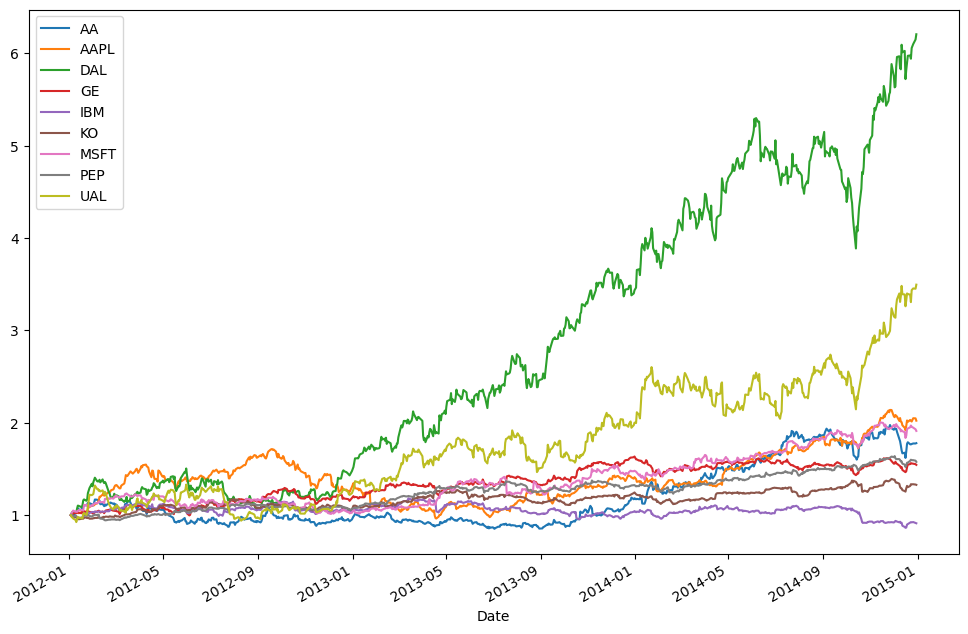

In [136]:
# plot all the cumulative returns
cum_daily_return.plot(figsize=(12,8))
_ = plt.legend(loc=2);
plt.savefig('5104OS_05_08.png', bbox_inches='tight', dpi=300)

## Analyzing distribution of returns

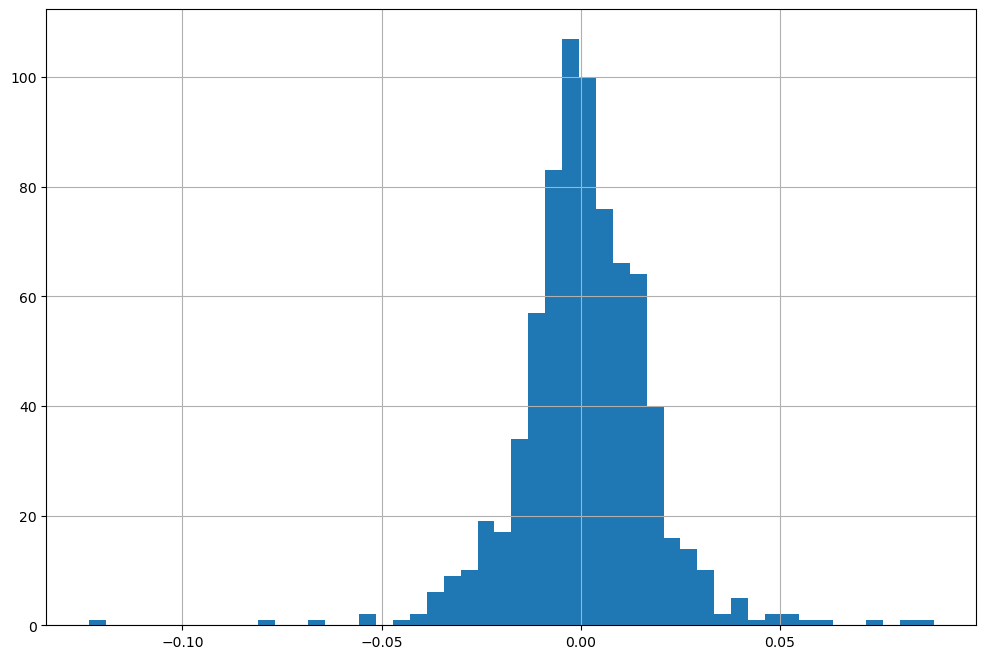

In [139]:
# plot daily % change values histogram for AAPL using 50 bins
aapl = daily_pct_change['AAPL']
_ = aapl.hist(bins=50, figsize=(12,8));
plt.savefig('5104OS_05_09.png', bbox_inches='tight', dpi=300)

In [141]:
# get descriptive statistics
aapl.describe()

count    7.530e+02
mean     1.078e-03
std      1.684e-02
min     -1.236e-01
25%     -7.313e-03
50%      5.068e-04
75%      1.101e-02
max      8.874e-02
Name: AAPL, dtype: float64

In [143]:
aapl.describe(percentiles=[0.025, 0.5, 0.975])

count    7.530e+02
mean     1.078e-03
std      1.684e-02
min     -1.236e-01
2.5%    -3.192e-02
50%      5.068e-04
97.5%    3.171e-02
max      8.874e-02
Name: AAPL, dtype: float64

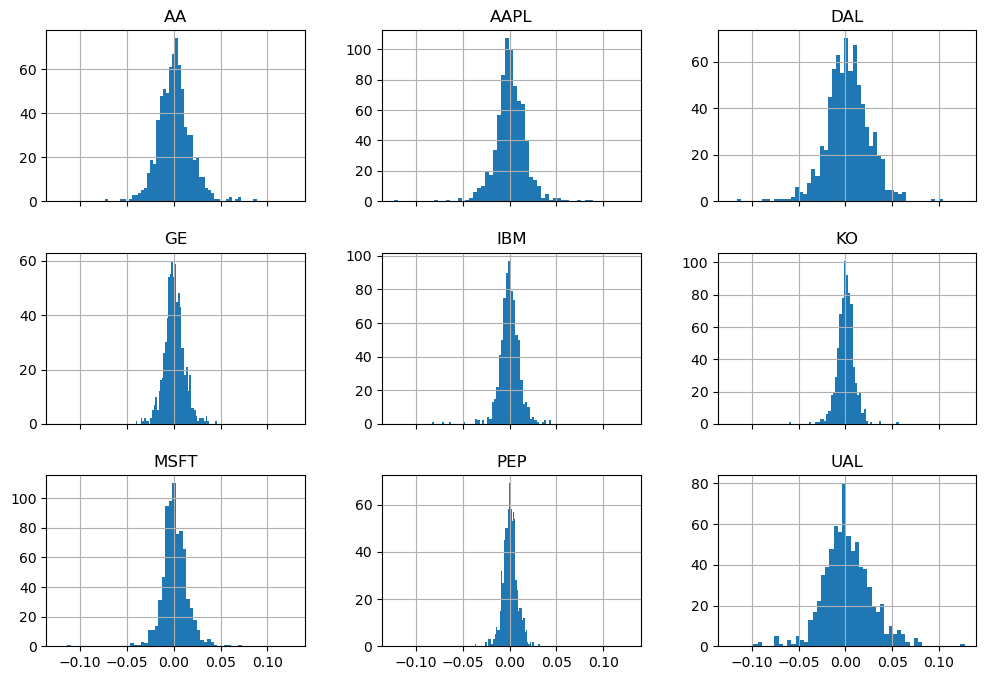

In [145]:
# plot all the cumulative return distributions
_ = daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8));
plt.savefig('5104OS_05_10.png', bbox_inches='tight', dpi=300)

### QQ-Plots

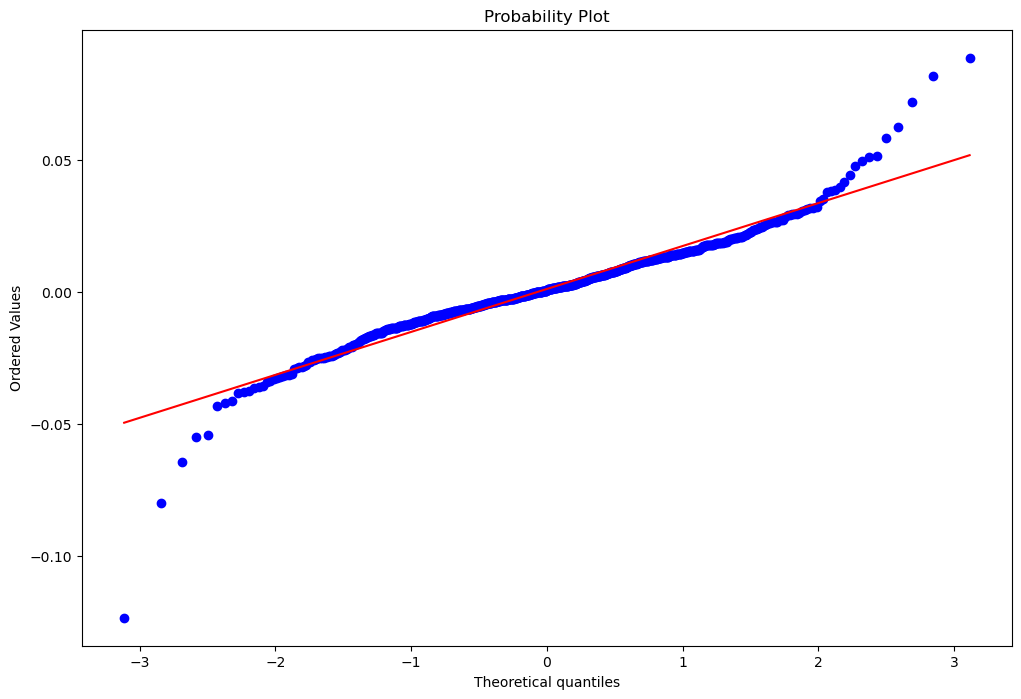

<Figure size 640x480 with 0 Axes>

In [148]:
# create a qq-plot of AAPl returns vs normal
import scipy.stats as stats
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
stats.probplot(aapl, dist='norm', plot=ax)
plt.show();
plt.savefig('5104OS_05_11.png', dpi=300)

### Box and whisker plots

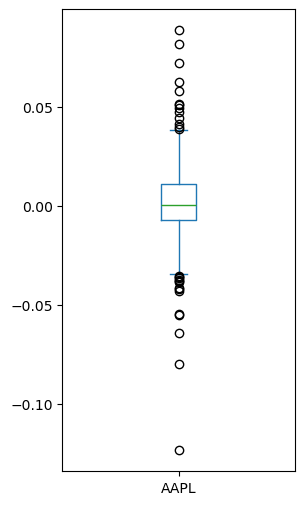

In [151]:
# create a box and whisker for the AAPL returns
_ = daily_pct_change[['AAPL']].plot(kind='box', figsize=(3,6));
plt.savefig('5104OS_05_12.png', dpi=300)

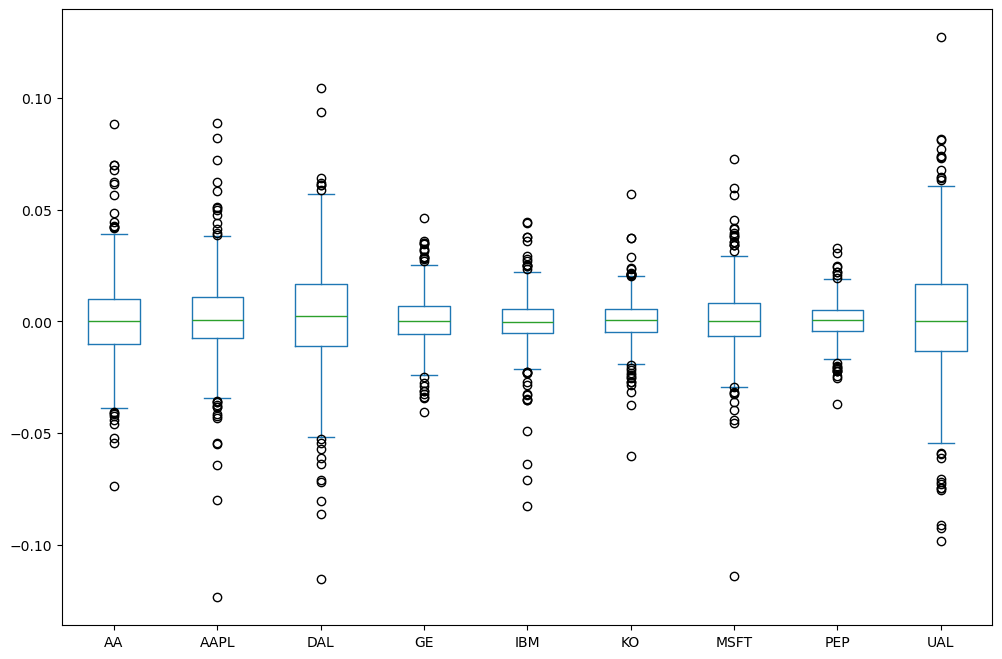

In [153]:
# examine all the returns 
daily_pct_change.plot(kind='box', figsize=(12,8));
plt.savefig('5104OS_05_13.png', dpi=300)

## Comparison of daily percentage change between stocks

In [156]:
def render_scatter_plot(data, x_stock_name, 
                        y_stock_name, xlim=None, ylim=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name], data[y_stock_name])
    if xlim is not None: ax.set_xlim(xlim)
    ax.autoscale(False)
    # horiz and v lines at 0
    ax.vlines(0, -10, 10)
    ax.hlines(0, -10, 10)
    # this line would be perfect correlation
    ax.plot((-10, 10), (-10, 10))
    # label axes
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)

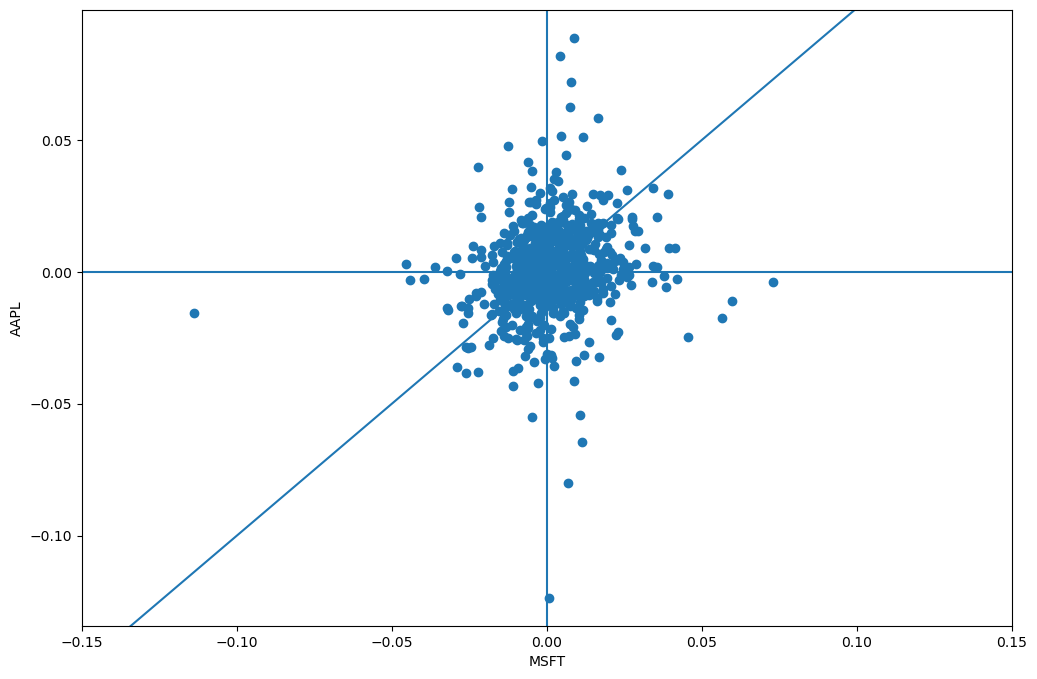

In [158]:
# MSFT vs AAPL
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'MSFT', 'AAPL', xlim=limits)
plt.savefig('5104OS_05_14.png', bbox_inches='tight', dpi=300)

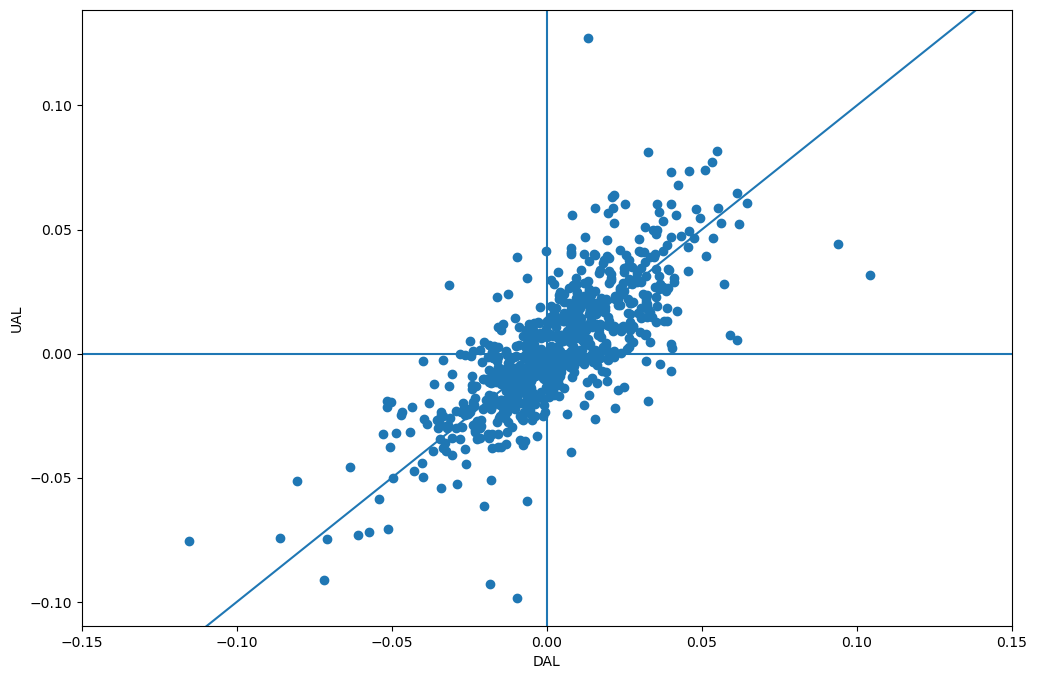

In [160]:
# DAL vs UAL
render_scatter_plot(daily_pct_change, 'DAL', 'UAL', xlim=limits)
plt.savefig('5104OS_05_15.png', bbox_inches='tight', dpi=300)

[*********************100%%**********************]  9 of 9 completed


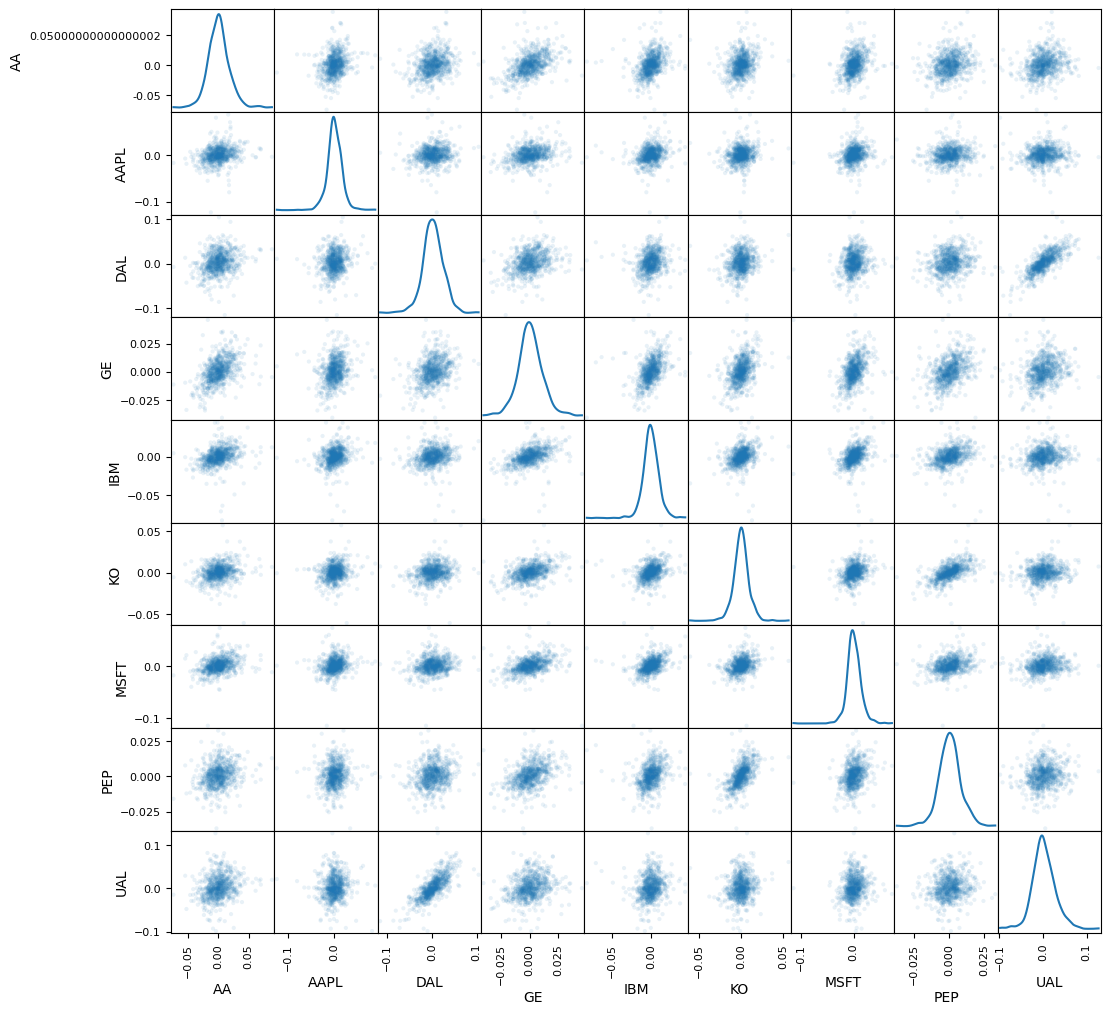

In [169]:
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Define the start and end dates
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# List of ticker symbols
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO']

# Fetch the data for all tickers
all_data = yf.download(tickers, start=start, end=end)

# Extract the adjusted close prices
just_closing_prices = all_data['Adj Close']

# Reset the index to get 'Date' as a column
just_closing_prices.reset_index(inplace=True)

# Melt the DataFrame to have 'Date' and 'Ticker' as columns
just_closing_prices_melted = just_closing_prices.melt(id_vars=['Date'], var_name='Ticker', value_name='Adj Close')

# Pivot 'Date' to the index and 'Ticker' values to columns
daily_close_px = just_closing_prices_melted.pivot(index='Date', columns='Ticker', values='Adj Close')

# Calculate the daily percentage change using pct_change
daily_pct_change = daily_close_px.pct_change()

# Set NaNs to 0
daily_pct_change.fillna(0, inplace=True)

# Create scatter matrix plot
_ = scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1, figsize=(12, 12))

# Save the plot to a file
plt.savefig('5104OS_05_16.png', bbox_inches='tight', dpi=300)
plt.show()

## Moving Windows

In [172]:
msftAC = msft['2012']['Adj Close']
msftAC[:5]

Date
2012-01-03    21.201
2012-01-04    21.699
2012-01-05    21.921
2012-01-06    22.262
2012-01-09    21.969
Name: Adj Close, dtype: float64

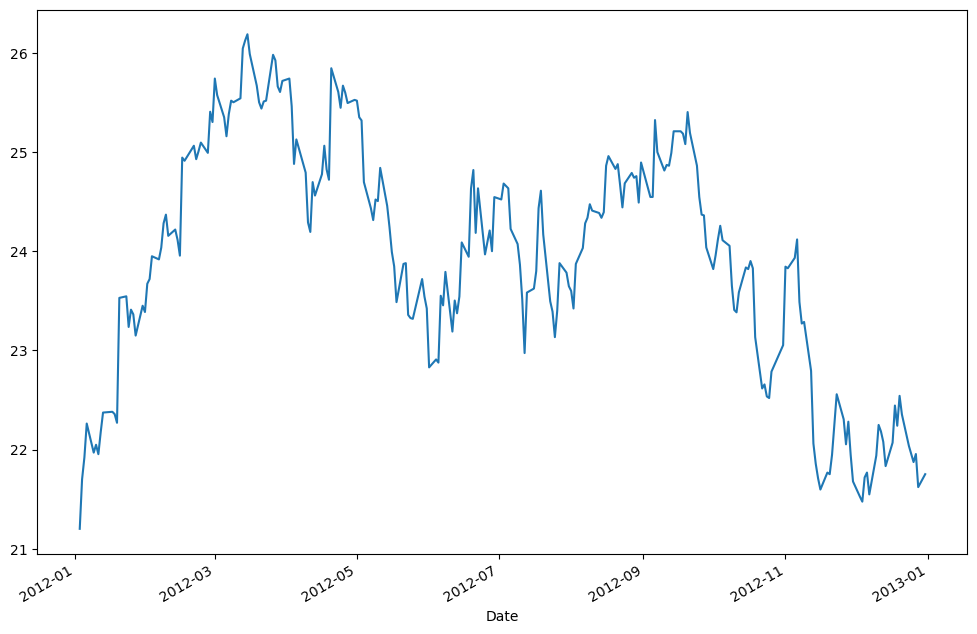

In [174]:
sample = msftAC['2012'] 
sample.plot(figsize=(12,8));
plt.savefig('5104OS_05_17.png', bbox_inches='tight', dpi=300)

[*********************100%%**********************]  9 of 9 completed


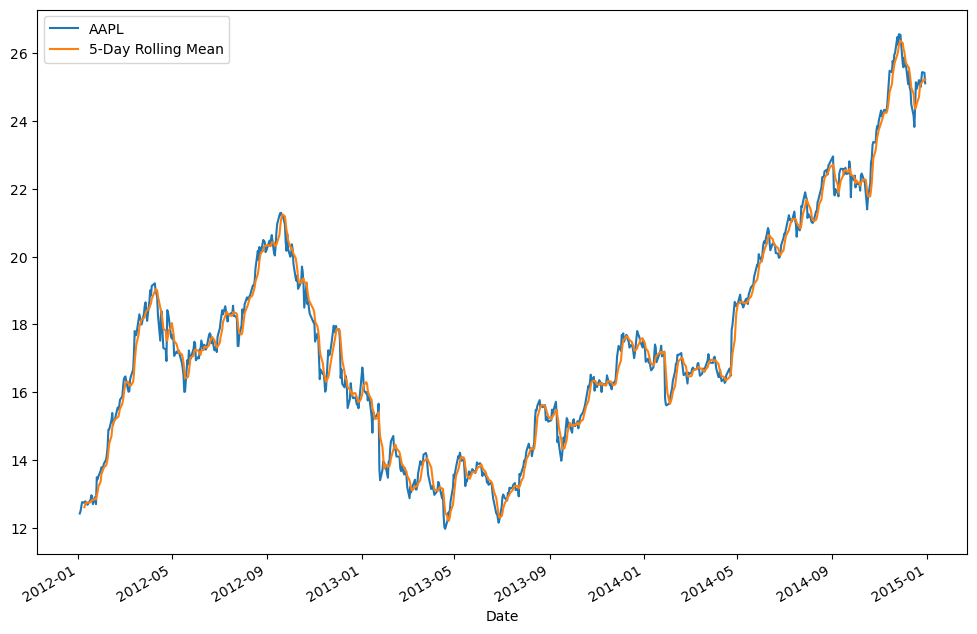

In [178]:
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

# Define the start and end dates
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# List of ticker symbols
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO']

# Fetch the data for all tickers
all_data = yf.download(tickers, start=start, end=end)

# Extract the adjusted close prices
just_closing_prices = all_data['Adj Close']

# Sample data for plotting (e.g., 'AAPL')
sample = just_closing_prices['AAPL']

# Plot the original data
sample.plot(figsize=(12, 8), label='AAPL')

# Calculate and plot the 5-day rolling mean
sample.rolling(window=5).mean().plot(figsize=(12, 8), label='5-Day Rolling Mean')

# Add legend to the plot
plt.legend()

# Save the plot to a file
plt.savefig('5104OS_05_18.png', bbox_inches='tight', dpi=300)
plt.show()

[*********************100%%**********************]  9 of 9 completed


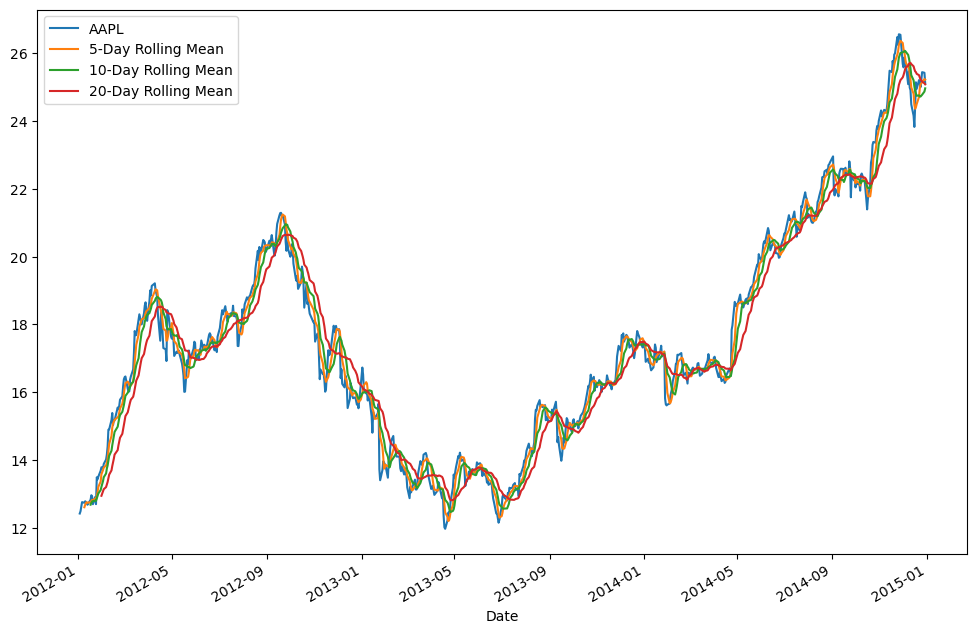

In [182]:
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

# Define the start and end dates
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# List of ticker symbols
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO']

# Fetch the data for all tickers
all_data = yf.download(tickers, start=start, end=end)

# Extract the adjusted close prices
just_closing_prices = all_data['Adj Close']

# Sample data for plotting (e.g., 'AAPL')
sample = just_closing_prices['AAPL']

# Plot the original data
sample.plot(figsize=(12, 8), label='AAPL')

# Calculate and plot the 5-day rolling mean
sample.rolling(window=5).mean().plot(figsize=(12, 8), label='5-Day Rolling Mean')

# Calculate and plot the 10-day rolling mean
sample.rolling(window=10).mean().plot(figsize=(12, 8), label='10-Day Rolling Mean')

# Calculate and plot the 20-day rolling mean
sample.rolling(window=20).mean().plot(figsize=(12, 8), label='20-Day Rolling Mean')

# Add legend to the plot
plt.legend()

# Save the plot to a file
plt.savefig('5104OS_05_19.png', bbox_inches='tight', dpi=300)
plt.show()

[*********************100%%**********************]  9 of 9 completed


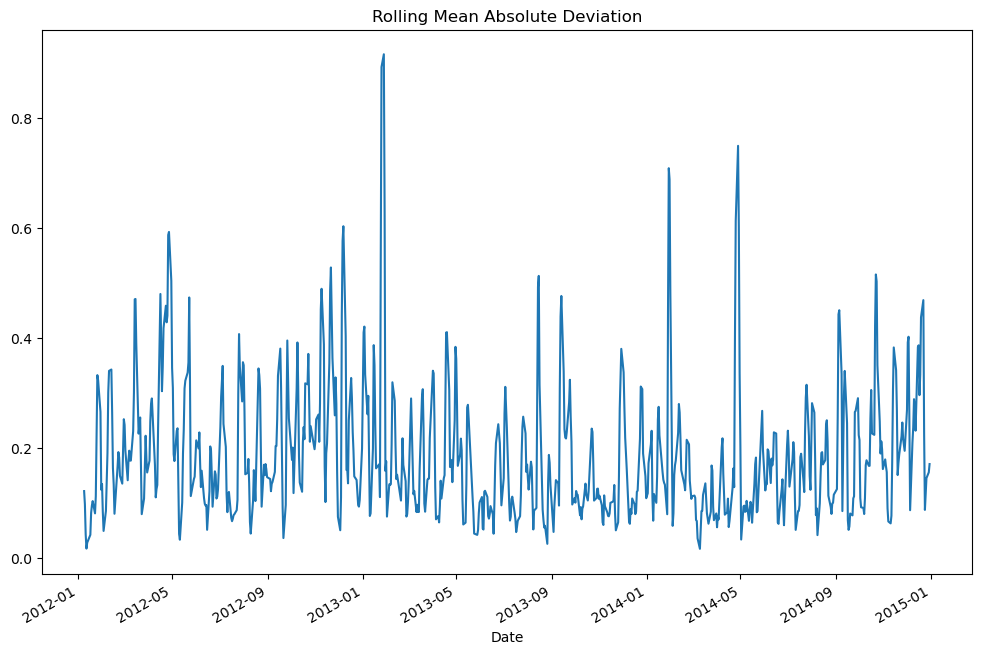

In [186]:
import pandas as pd
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt

# Define the start and end dates
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# List of ticker symbols
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO']

# Fetch the data for all tickers
all_data = yf.download(tickers, start=start, end=end)

# Extract the adjusted close prices
just_closing_prices = all_data['Adj Close']

# Sample data for plotting (e.g., 'AAPL')
sample = just_closing_prices['AAPL']

# Define the mean absolute deviation function
mean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()

# Calculate and plot the rolling mean absolute deviation
sample.rolling(window=5).apply(mean_abs_dev).plot(figsize=(12, 8), title='Rolling Mean Absolute Deviation')

# Save the plot to a file
plt.savefig('5104OS_05_20.png', bbox_inches='tight', dpi=300)
plt.show()

[*********************100%%**********************]  9 of 9 completed


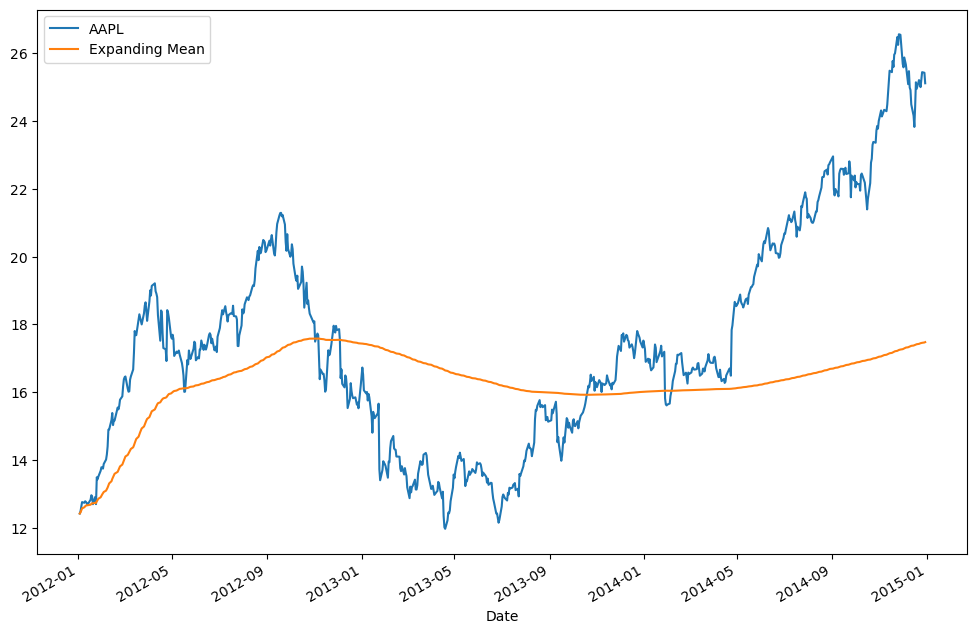

In [190]:
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

# Define the start and end dates
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# List of ticker symbols
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO']

# Fetch the data for all tickers
all_data = yf.download(tickers, start=start, end=end)

# Extract the adjusted close prices
just_closing_prices = all_data['Adj Close']

# Sample data for plotting (e.g., 'AAPL')
sample = just_closing_prices['AAPL']

# Plot the original data
sample.plot(figsize=(12, 8), label='AAPL')

# Calculate and plot the expanding mean
sample.expanding(min_periods=1).mean().plot(figsize=(12, 8), label='Expanding Mean')

# Add legend to the plot
plt.legend()

# Save the plot to a file
plt.savefig('5104OS_05_21.png', bbox_inches='tight', dpi=300)
plt.show()

## Volatility calculation

[*********************100%%**********************]  9 of 9 completed


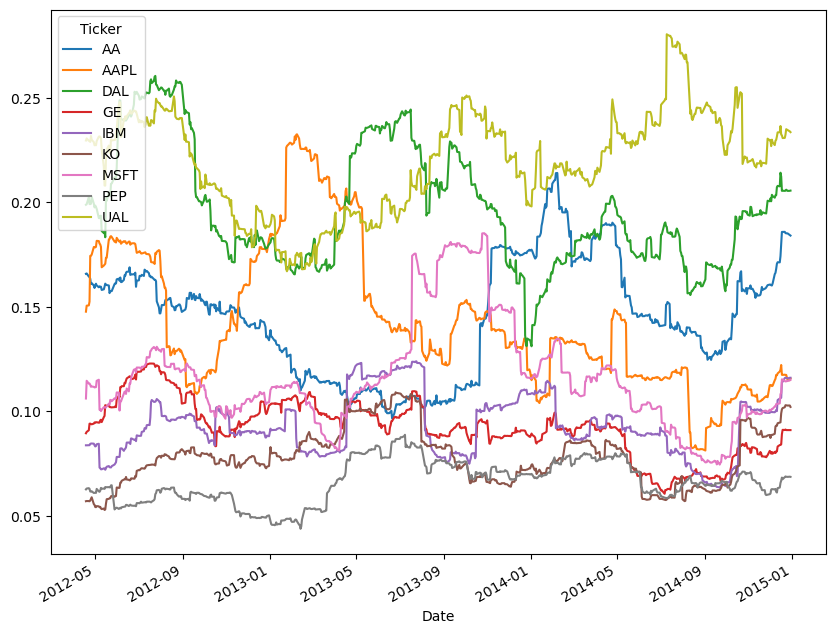

In [195]:
import pandas as pd
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt

# Define the start and end dates
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# List of ticker symbols
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO']

# Fetch the data for all tickers
all_data = yf.download(tickers, start=start, end=end)

# Extract the adjusted close prices
just_closing_prices = all_data['Adj Close']

# Calculate the daily percentage change
daily_pct_change = just_closing_prices.pct_change()

# Set NaNs to 0
daily_pct_change.fillna(0, inplace=True)

# Define the minimum number of periods
min_periods = 75

# Calculate the rolling standard deviation
vol = daily_pct_change.rolling(window=min_periods).std() * np.sqrt(min_periods)

# Plot the rolling standard deviation
vol.plot(figsize=(10, 8))

# Save the plot to a file
plt.savefig('5104OS_05_22.png', bbox_inches='tight', dpi=300)
plt.show()

## Rolling correlation of returns

[*********************100%%**********************]  2 of 2 completed


Date
2013-01-03    0.290
2013-01-04    0.296
2013-01-07    0.297
2013-01-08    0.295
2013-01-09    0.292
              ...  
2014-12-23    0.229
2014-12-24    0.232
2014-12-26    0.230
2014-12-29    0.230
2014-12-30    0.232
Length: 502, dtype: float64


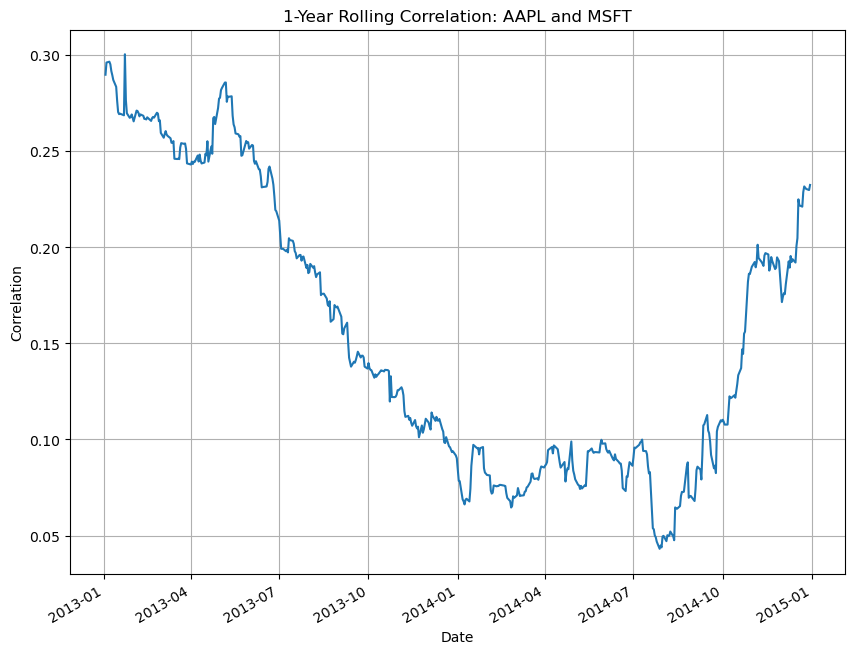

In [200]:
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

# Define the start and end dates
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# List of ticker symbols
tickers = ['AAPL', 'MSFT']

# Fetch the data for the selected tickers
all_data = yf.download(tickers, start=start, end=end)

# Extract the adjusted close prices
just_closing_prices = all_data['Adj Close']

# Calculate the daily percentage change
daily_pct_change = just_closing_prices.pct_change()

# Set NaNs to 0
daily_pct_change.fillna(0, inplace=True)

# Calculate the one-year (252 days) rolling correlation of AAPL and MSFT
rolling_corr = daily_pct_change['AAPL'].rolling(window=252).corr(daily_pct_change['MSFT']).dropna()

# Display the rolling correlation
print(rolling_corr)

# Plot the rolling correlation
rolling_corr.plot(figsize=(10, 8), title='1-Year Rolling Correlation: AAPL and MSFT')
plt.ylabel('Correlation')
plt.xlabel('Date')
plt.grid(True)

# Save the plot to a file
plt.savefig('5104OS_05_23.png', bbox_inches='tight', dpi=300)
plt.show()

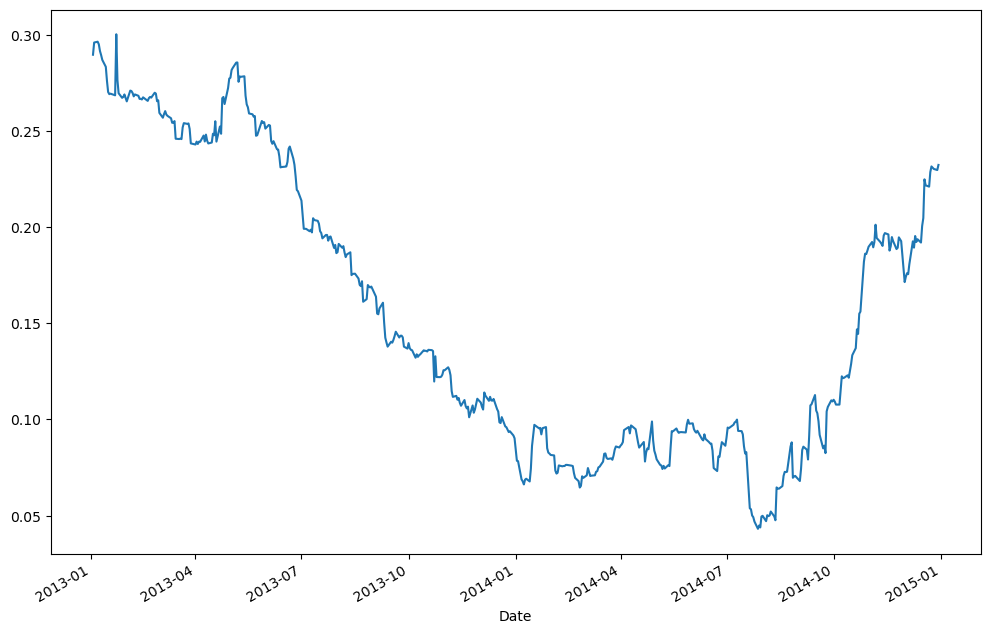

In [202]:
# plot the rolling correlation
_ = rolling_corr.plot(figsize=(12,8));
plt.savefig('5104OS_05_23.png', bbox_inches='tight', dpi=300)

## Least squares regression of returns (beta)

[*********************100%%**********************]  2 of 2 completed


Date
2013-01-02    0.408
2013-01-03    0.414
2013-01-04    0.422
2013-01-07    0.421
2013-01-08    0.422
              ...  
2014-12-23    0.265
2014-12-24    0.265
2014-12-26    0.261
2014-12-29    0.261
2014-12-30    0.261
Length: 503, dtype: float64


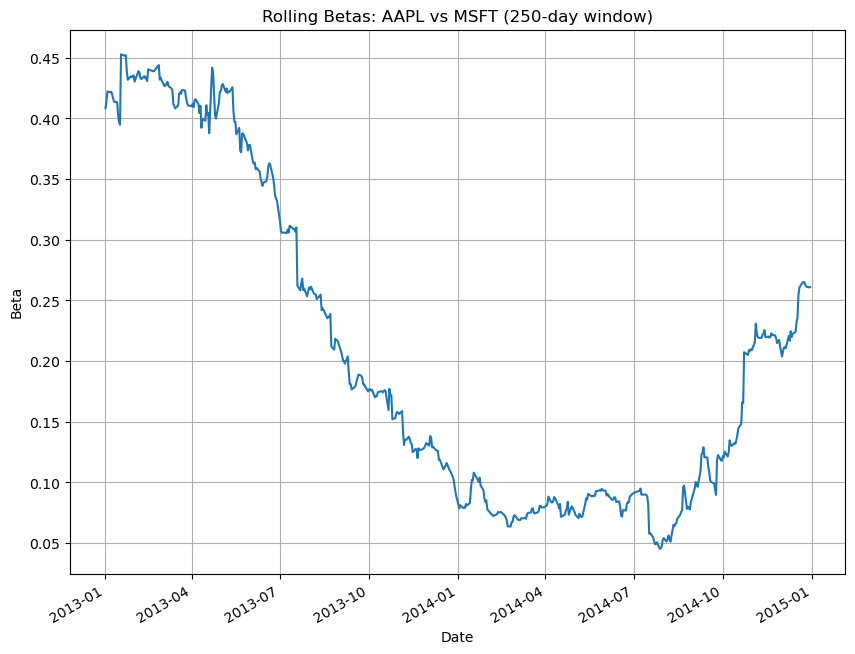

In [209]:
import pandas as pd
import yfinance as yf
import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define the start and end dates
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# List of ticker symbols
tickers = ['AAPL', 'MSFT']

# Fetch the data for the selected tickers
all_data = yf.download(tickers, start=start, end=end)

# Extract the adjusted close prices
just_closing_prices = all_data['Adj Close']

# Calculate the daily percentage change
daily_pct_change = just_closing_prices.pct_change().dropna()

# Define a function to perform rolling OLS regression
def rolling_ols(y, x, window):
    betas = []
    index = y.index[window-1:]
    for i in range(len(index)):
        y_window = y[i:i+window]
        x_window = x[i:i+window]
        x_window = sm.add_constant(x_window)  # Adds a constant term to the predictor
        model = sm.OLS(y_window, x_window).fit()
        betas.append(model.params['MSFT'])
    return pd.Series(betas, index=index)

# Perform rolling OLS regression with a 250-day window
rolling_betas = rolling_ols(daily_pct_change['AAPL'], daily_pct_change['MSFT'], window=250)

# Display the rolling betas
print(rolling_betas)

# Plot the rolling betas
rolling_betas.plot(figsize=(10, 8), title='Rolling Betas: AAPL vs MSFT (250-day window)')
plt.ylabel('Beta')
plt.xlabel('Date')
plt.grid(True)

# Save the plot to a file
plt.savefig('5104OS_05_24.png', bbox_inches='tight', dpi=300)
plt.show()

[*********************100%%**********************]  2 of 2 completed


Date
2013-01-02    0.408
2013-01-03    0.414
2013-01-04    0.422
2013-01-07    0.421
2013-01-08    0.422
dtype: float64


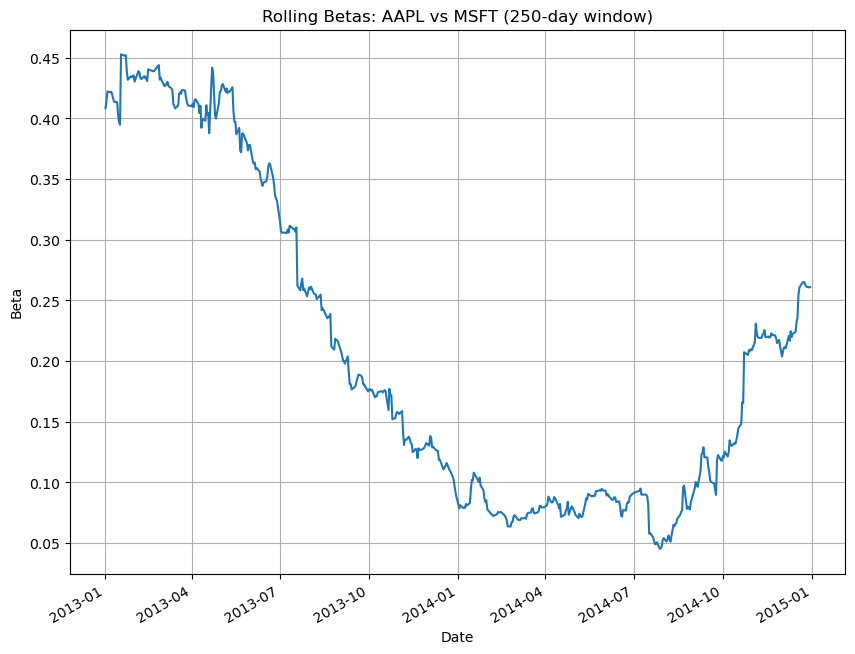

In [213]:
import pandas as pd
import yfinance as yf
import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define the start and end dates
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# List of ticker symbols
tickers = ['AAPL', 'MSFT']

# Fetch the data for the selected tickers
all_data = yf.download(tickers, start=start, end=end)

# Extract the adjusted close prices
just_closing_prices = all_data['Adj Close']

# Calculate the daily percentage change
daily_pct_change = just_closing_prices.pct_change().dropna()

# Define a function to perform rolling OLS regression
def rolling_ols(y, x, window):
    betas = []
    index = y.index[window-1:]
    for i in range(len(index)):
        y_window = y[i:i+window]
        x_window = x[i:i+window]
        x_window = sm.add_constant(x_window)  # Adds a constant term to the predictor
        model = sm.OLS(y_window, x_window).fit()
        betas.append(model.params['MSFT'])
    return pd.Series(betas, index=index)

# Perform rolling OLS regression with a 250-day window
rolling_betas = rolling_ols(daily_pct_change['AAPL'], daily_pct_change['MSFT'], window=250)

# Display the first 5 rolling betas
print(rolling_betas.head())

# Plot the rolling betas
rolling_betas.plot(figsize=(10, 8), title='Rolling Betas: AAPL vs MSFT (250-day window)')
plt.ylabel('Beta')
plt.xlabel('Date')
plt.grid(True)

# Save the plot to a file
plt.savefig('5104OS_05_24.png', bbox_inches='tight', dpi=300)
plt.show()

In [215]:
_ = model.beta['MSFT'].plot(figsize=(12, 8)); # plot the beta
plt.savefig('5104OS_05_24.png', bbox_inches='tight', dpi=300)

NameError: name 'model' is not defined

# Comparing stocks to the S&P 500

In [218]:
# we need to calculate the pct change on the close for S&P 500
sp_500_dpc = sp_500['Adj Close'].pct_change().fillna(0)
sp_500_dpc[:5]

Date
2012-01-03    0.000e+00
2012-01-04    1.879e-04
2012-01-05    2.944e-03
2012-01-06   -2.537e-03
2012-01-09    2.262e-03
Name: Adj Close, dtype: float64

In [220]:
# now concat the S&P data with the other daily pct values
dpc_all = pd.concat([sp_500_dpc, daily_pct_change], axis=1)
dpc_all.rename(columns={'Adj Close': 'SP500'}, inplace=True)
dpc_all[:5]

                SP500   AAPL   MSFT
Date                               
2012-01-03  0.000e+00    NaN    NaN
2012-01-04  1.879e-04  0.005  0.024
2012-01-05  2.944e-03  0.011  0.010
2012-01-06 -2.537e-03  0.010  0.016
2012-01-09  2.262e-03 -0.002 -0.013

In [222]:
# from all the daily, calculate the cumulative
cdr_all = (1 + dpc_all).cumprod()
cdr_all[:5]

            SP500   AAPL   MSFT
Date                           
2012-01-03  1.000    NaN    NaN
2012-01-04  1.000  1.005  1.024
2012-01-05  1.003  1.017  1.034
2012-01-06  1.001  1.027  1.050
2012-01-09  1.003  1.026  1.036

In [224]:
# calculate the correlations
dpc_corrs = dpc_all.corr()
dpc_corrs

       SP500   AAPL   MSFT
SP500  1.000  0.410  0.536
AAPL   0.410  1.000  0.187
MSFT   0.536  0.187  1.000

[*********************100%%**********************]  10 of 10 completed


Ticker
AA       0.599
AAPL     0.410
DAL      0.420
GE       0.727
IBM      0.533
KO       0.526
MSFT     0.536
PEP      0.519
UAL      0.326
SP500    1.000
Name: SP500, dtype: float64


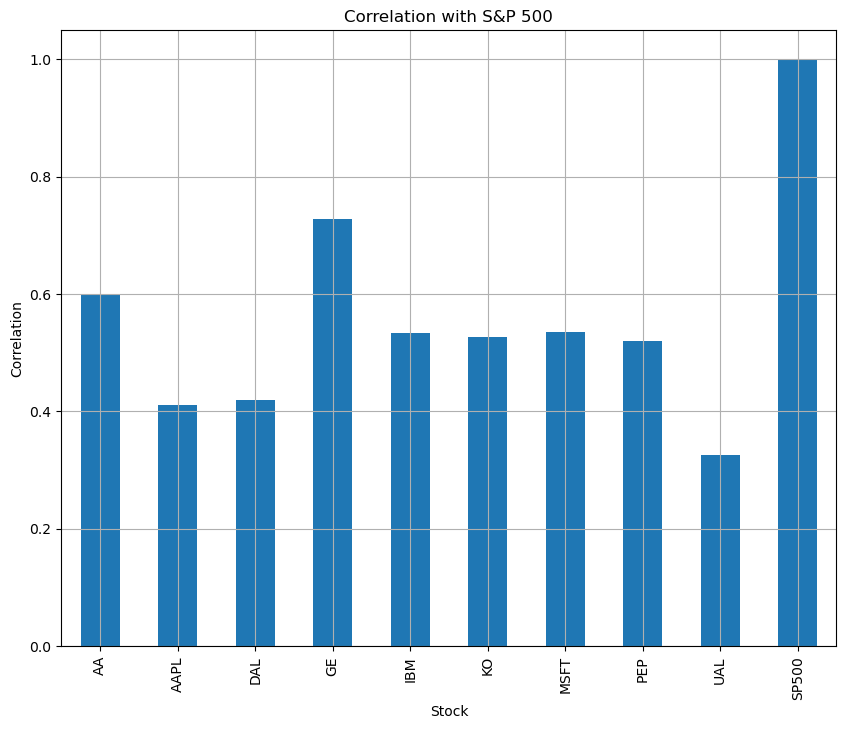

In [228]:
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

# Define the start and end dates
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# List of ticker symbols including S&P 500
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO', '^GSPC']

# Fetch the data for all tickers
all_data = yf.download(tickers, start=start, end=end)

# Extract the adjusted close prices
just_closing_prices = all_data['Adj Close']

# Calculate the daily percentage change
daily_pct_change = just_closing_prices.pct_change().dropna()

# Rename the S&P 500 column for convenience
daily_pct_change.rename(columns={'^GSPC': 'SP500'}, inplace=True)

# Calculate the correlation of each stock's returns with the S&P 500 returns
dpc_corrs = daily_pct_change.corr()

# Display the correlation of each stock with the S&P 500
sp500_corrs = dpc_corrs['SP500']
print(sp500_corrs)

# Plot the correlations
sp500_corrs.plot(kind='bar', figsize=(10, 8), title='Correlation with S&P 500')
plt.ylabel('Correlation')
plt.xlabel('Stock')
plt.grid(True)

# Save the plot to a file
plt.savefig('5104OS_05_25.png', bbox_inches='tight', dpi=300)
plt.show()

[*********************100%%**********************]  3 of 3 completed


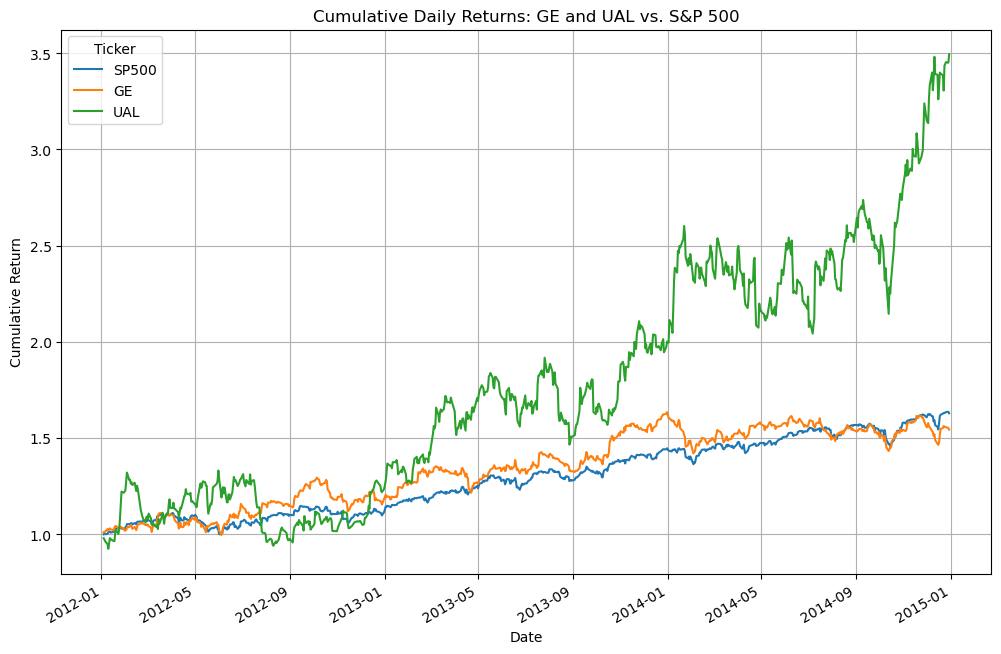

In [232]:
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

# Define the start and end dates
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# List of ticker symbols including S&P 500
tickers = ['GE', 'UAL', '^GSPC']

# Fetch the data for all tickers
all_data = yf.download(tickers, start=start, end=end)

# Extract the adjusted close prices
just_closing_prices = all_data['Adj Close']

# Calculate the daily percentage change
daily_pct_change = just_closing_prices.pct_change().dropna()

# Rename the S&P 500 column for convenience
daily_pct_change.rename(columns={'^GSPC': 'SP500'}, inplace=True)

# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_change).cumprod()

# Plot GE and UAL against S&P 500
_ = cum_daily_return[['SP500', 'GE', 'UAL']].plot(figsize=(12, 8), title='Cumulative Daily Returns: GE and UAL vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)

# Save the plot to a file
plt.savefig('5104OS_05_25.png', bbox_inches='tight', dpi=300)
plt.show()

[*********************100%%**********************]  2 of 2 completed


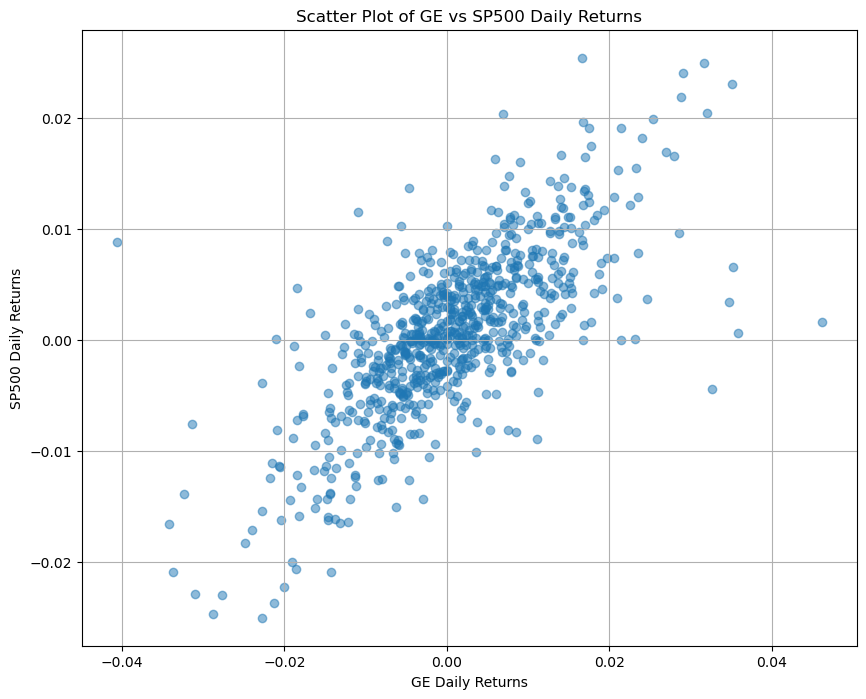

<Figure size 640x480 with 0 Axes>

In [236]:
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

# Define the start and end dates
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# List of ticker symbols including S&P 500
tickers = ['GE', '^GSPC']

# Fetch the data for all tickers
all_data = yf.download(tickers, start=start, end=end)

# Extract the adjusted close prices
just_closing_prices = all_data['Adj Close']

# Calculate the daily percentage change
daily_pct_change = just_closing_prices.pct_change().dropna()

# Rename the S&P 500 column for convenience
daily_pct_change.rename(columns={'^GSPC': 'SP500'}, inplace=True)

# Function to render scatter plot
def render_scatter_plot(df, stock1, stock2):
    plt.figure(figsize=(10, 8))
    plt.scatter(df[stock1], df[stock2], alpha=0.5)
    plt.title(f'Scatter Plot of {stock1} vs {stock2} Daily Returns')
    plt.xlabel(f'{stock1} Daily Returns')
    plt.ylabel(f'{stock2} Daily Returns')
    plt.grid(True)
    plt.show()

# Render scatter plot for GE vs S&P 500
render_scatter_plot(daily_pct_change, 'GE', 'SP500')

# Save the plot to a file
plt.savefig('5104OS_05_26.png', bbox_inches='tight', dpi=300)
plt.show()

[*********************100%%**********************]  2 of 2 completed


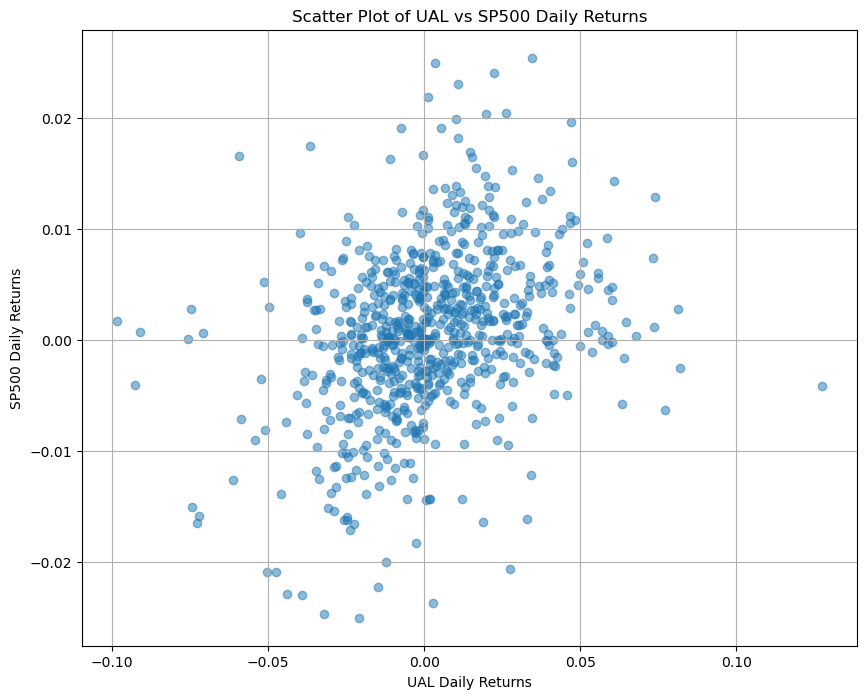

In [240]:
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

# Define the start and end dates
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2014, 12, 31)

# List of ticker symbols including S&P 500
tickers = ['UAL', '^GSPC']

# Fetch the data for all tickers
all_data = yf.download(tickers, start=start, end=end)

# Extract the adjusted close prices
just_closing_prices = all_data['Adj Close']

# Calculate the daily percentage change
daily_pct_change = just_closing_prices.pct_change().dropna()

# Rename the S&P 500 column for convenience
daily_pct_change.rename(columns={'^GSPC': 'SP500'}, inplace=True)

# Function to render scatter plot
def render_scatter_plot(df, stock1, stock2):
    plt.figure(figsize=(10, 8))
    plt.scatter(df[stock1], df[stock2], alpha=0.5)
    plt.title(f'Scatter Plot of {stock1} vs {stock2} Daily Returns')
    plt.xlabel(f'{stock1} Daily Returns')
    plt.ylabel(f'{stock2} Daily Returns')
    plt.grid(True)

# Render scatter plot for UAL vs S&P 500
render_scatter_plot(daily_pct_change, 'UAL', 'SP500')

# Save the plot to a file
plt.savefig('5104OS_05_27.png', bbox_inches='tight', dpi=300)
plt.show()